<a href="https://colab.research.google.com/github/alirempel/cap-comp215/blob/main/lessons/week03-objects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classes and Objects
Our week 3 lesson workbook, available on Github from the powderflask/cap-comp215 repository.

As usual, the first code block just imports the modules we will use.

In [1]:
import math
import random
from collections import defaultdict

import matplotlib.pyplot as plt
from pprint import pprint

### Everything in `python` is an `object`!
  * and every `object` has a `type`!
    * use `type(object)` to learn the type of an object
    * a `class` is used to define a `type`!
  * even a `function` is an `object` !!
  * an `object` has attributes, you can just add new attributes to any object (but don't!)

A little code to demonstrate...

In [9]:
# demo code
def foo():
  pass

class Foo:
  pass

f = Foo()

type(Foo), type(Foo())
type(int), type(int(42))
type(zip), type(zip((1,2),("a","b")))
type(type)

type

## Stack
A type of collection where data is inserted and removed from the same 'end' of the collection. Operations are:
* push(item) -> None
* top() -> item
* pop() -> item

In [10]:
class Stack:
  """ A stack type that implements classic stack operations. """

  def __init__(self):
    self._items = [] # underscore in front means dont touch data

  def __lt__(self, other):
    """ return True iff self is shorter than other """
    return len(self._items) < len(other._items)

  def push(self,item):
    """ Push the item to top of stack (mutator) """
    self._items.append(item)

  def pop(self):
    """ remove item from top of stack and return it """
    return self._items.pop()

  def top(self):
    """ examine top of stack and return item with out removing it """
    return self._items[-1]

  def is_empty(self):
    """ return True iff there are no elements in stack """
    return len(self._items) == 0


def test_stack():
  s = Stack()
  t = Stack()
  s.is_empty() # self is thing on left of "."
  t.push(42)
  t.push(99)
  t.push(101)
  assert t.top() == 101
  assert t.pop() == 101
  assert t.top() == 99
  assert not t.is_empty()
  assert s < t and not t < s
  print("tests pass")

test_stack()
# Stack.__lt__(t,s) == t < s
# int.__lt__(42,99) == 42 < 99

tests pass


## Problem: Collision detection using circles
A `class` is just a collection of `functions` that all work on the same piece of `data structure`.

The `data structure` is defined by the class's `instance variables`.

Easiest to understand if we do an example - let's define a `Circle` object type...

In [19]:
class Circle:
    """ Representation for the data and operations on a circle """

    def __init__(self, radius:float, centre:tuple):
      assert len(centre) == 2

      self.radius = radius
      self.centre = centre


    def area(self):
        """ Return the area of this circle """
        return math.pi * self.radius**2

    def move(self, offset:tuple):
        """ Move this circle by given (x,y) offset """
        self.centre = (self.centre[0] + offset[0], self.centre[1] + offset[1])

    def distance(self, other:Circle):
        """ Return the distance between this circle's centre and the other one """
        return math.dist(self.centre, other.centre)

    def intersects(self, other:Circle):
        """ Return True iff this circle intersects the other one """
        return self.radius + other.radius > self.distance(other)


In [38]:
# Test Circle class
def test_circle():
  c1 = Circle(3,(2,4))
  c2 = Circle(2,(5,8))
  assert c1 != c2 and c1.radius != c2.radius and c1.centre != c2.centre

  assert c1.area() == 9 * math.pi
  assert c1.distance(c2) == c2.distance(c1)
  assert c1.distance(c2) == 5.0
  assert c1.intersects(c2) == False
  c1.move((1,1))
  assert c1.intersects(c2) == True

  print('tests passed!!')

test_circle()

tests passed!!


## Problem:  Counting
When conducting an experiment, it is common to count occurances.  For example

* in a physics experiment, we might count the number of atomic collisions in which certain sub-atomic particles were produced
* in biology, we might count the number of cells infected by a virus after a fixed time period
* in a computational experiment, we might count the frequency with which clusters of a give size form

To visualize such experimental results, we would generally plot a histogram, like this:


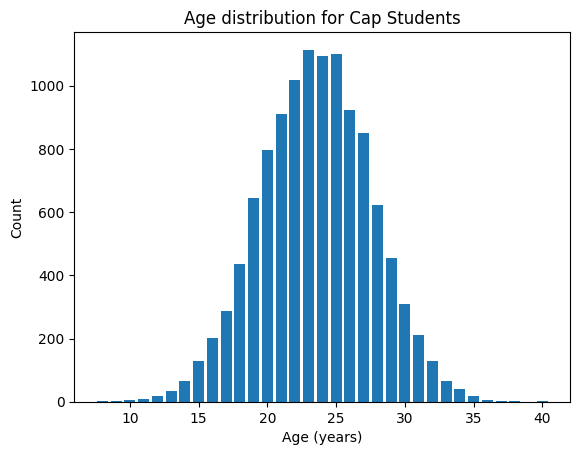

In [6]:
# Experiment: Get the age distribution for Cap students
n_cap_students = 11500

# Simulate getting the age for one Cap student
def get_age(student_id):
    return int(random.normalvariate(mu=24, sigma=4))  # Normally distributed age with mean of 24 years

# Run experiment to obtain the age for each student
data = [get_age(id) for id in range(n_cap_students)]

# count the number of students in each age class
histogram = {}
for age in data:
    histogram[age] = histogram.get(age, 0) + 1

# configure a plot to draw the bar chart in
_, ax = plt.subplots()
ax.set(
    title="Age distribution for Cap Students",
    xlabel='Age (years)',
    ylabel='Count',
)

# plot a histogram of the data, divided into n "equal width" bins
ax.bar(histogram.keys(), histogram.values())
plt.show()

## Custom Histogram Class

Define our own historgram class that serves as a "wrapper" for clunky pyplot ax.hist

In [7]:
class Histogram:
    """ A simple histogram with a nice API """
    def __init__(self, title, xlabel='Categories', ylabel='Count'):
        _, ax = plt.subplots()
        ax.set(
            title=title,
            xlabel=xlabel,
            ylabel=ylabel,
        )
        self.ax = ax
        self.counts = {}

    def count(self, category):
        self.counts[category] = self.counts.get(category, 0) + 1

    def plot(self):
        self.ax.bar(self.counts.keys(), self.counts.values())
        plt.show()

### The Power of Abstraction

The real benefits appear when we go to use this class to solve the original problem.

Notice how creating an "abstraction" for a histogram makes it much easier to understand what the computation is doing.  Also notice, the class is "reusable" - we can now deploy this abstraction any time we need a histogram!

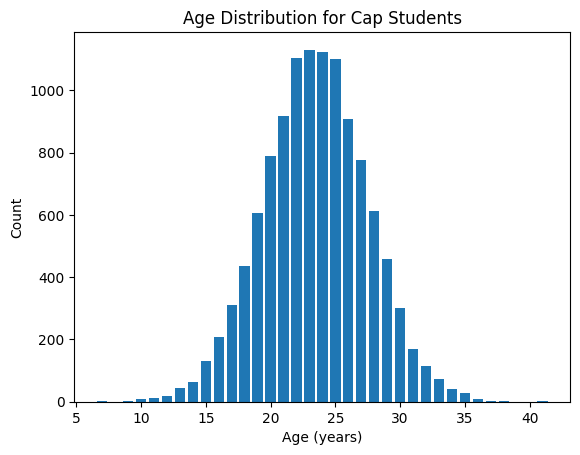

In [8]:
hist = Histogram(title='Age Distribution for Cap Students', xlabel='Age (years)')
for id in range(n_cap_students):
    hist.count(get_age(id))
hist.plot()